In [115]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

In [116]:
df = pd.read_excel('heart.xlsx')

In [117]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [118]:
df.shape

(299, 13)

In [119]:
df.DEATH_EVENT.value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

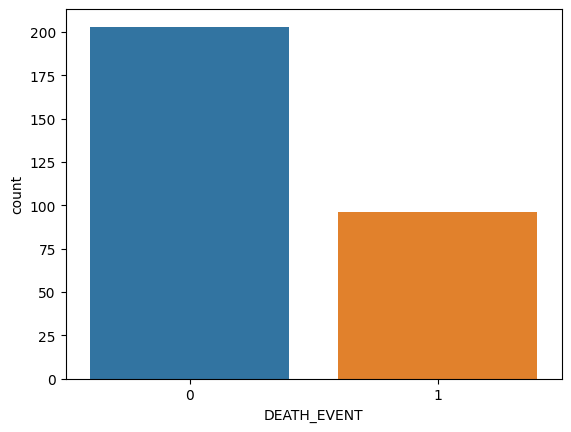

In [120]:
sns.countplot(x = 'DEATH_EVENT', data = df)

<Axes: xlabel='diabetes', ylabel='count'>

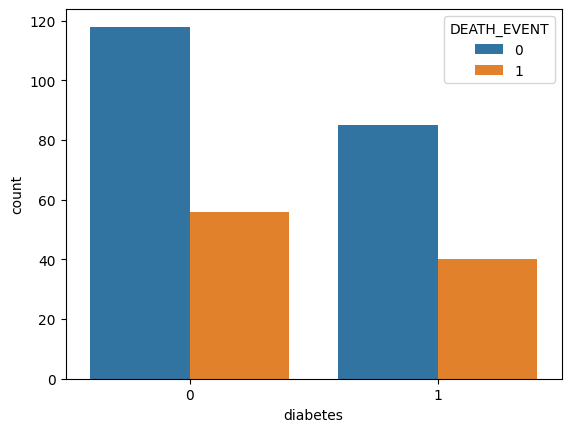

In [121]:
sns.countplot(x = 'diabetes', hue = 'DEATH_EVENT', data = df)

In [122]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


<Axes: title={'center': 'Correlation for every column'}>

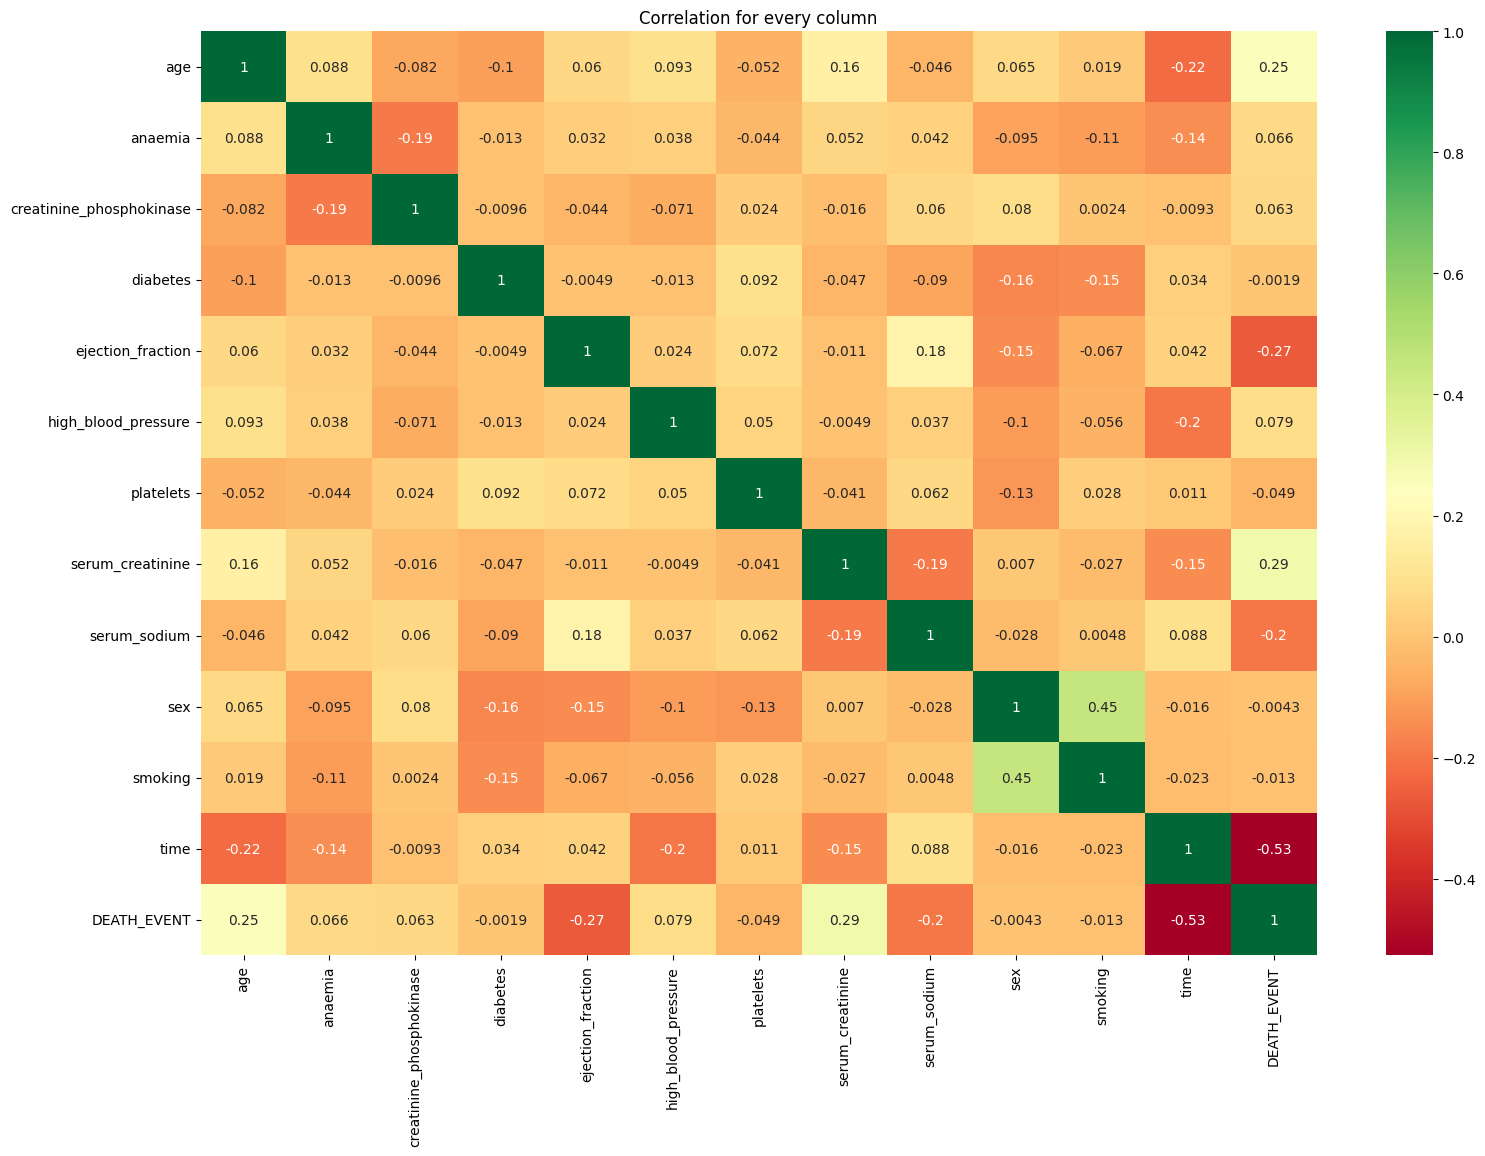

In [123]:
plt.figure(figsize = (18, 12))
plt.title('Correlation for every column')
sns.heatmap(df.corr(), annot = True, cmap = 'RdYlGn')

# Separate X, Y

In [124]:
x = df.drop('DEATH_EVENT', axis = 1)

In [125]:
y = df[['DEATH_EVENT']]

In [126]:
x.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8


In [127]:
y.head()

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1


In [128]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size = 0.3, random_state = 42)

In [129]:
xtrain.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205
68,70.0,0,161,0,25,0,244000.0,1.2,142,0,0,66
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
37,82.0,1,855,1,50,1,321000.0,1.0,145,0,0,30
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14


In [130]:
ytrain.head()

,DEATH_EVENT
224,0
68,1
222,0
37,1
16,1


In [131]:
xtrain.shape

(209, 12)

In [132]:
xtest.shape

(90, 12)

In [133]:
dt = DecisionTreeClassifier()

In [134]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

[Text(0.4605263157894737, 0.95, 'time <= 67.5\ngini = 0.405\nsamples = 209\nvalue = [150, 59]\nclass = 0'),
 Text(0.22807017543859648, 0.85, 'ejection_fraction <= 72.5\ngini = 0.249\nsamples = 48\nvalue = [7, 41]\nclass = 1'),
 Text(0.19298245614035087, 0.75, 'creatinine_phosphokinase <= 109.5\ngini = 0.223\nsamples = 47\nvalue = [6, 41]\nclass = 1'),
 Text(0.07017543859649122, 0.65, 'time <= 24.0\ngini = 0.444\nsamples = 12\nvalue = [4, 8]\nclass = 1'),
 Text(0.03508771929824561, 0.55, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.10526315789473684, 0.55, 'creatinine_phosphokinase <= 101.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]\nclass = 1'),
 Text(0.07017543859649122, 0.45, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = 1'),
 Text(0.14035087719298245, 0.45, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3157894736842105, 0.65, 'creatinine_phosphokinase <= 1818.5\ngini = 0.108\nsamples = 35\nvalue = [2, 33]\nclass = 1'),
 Text(0.24561403508771928

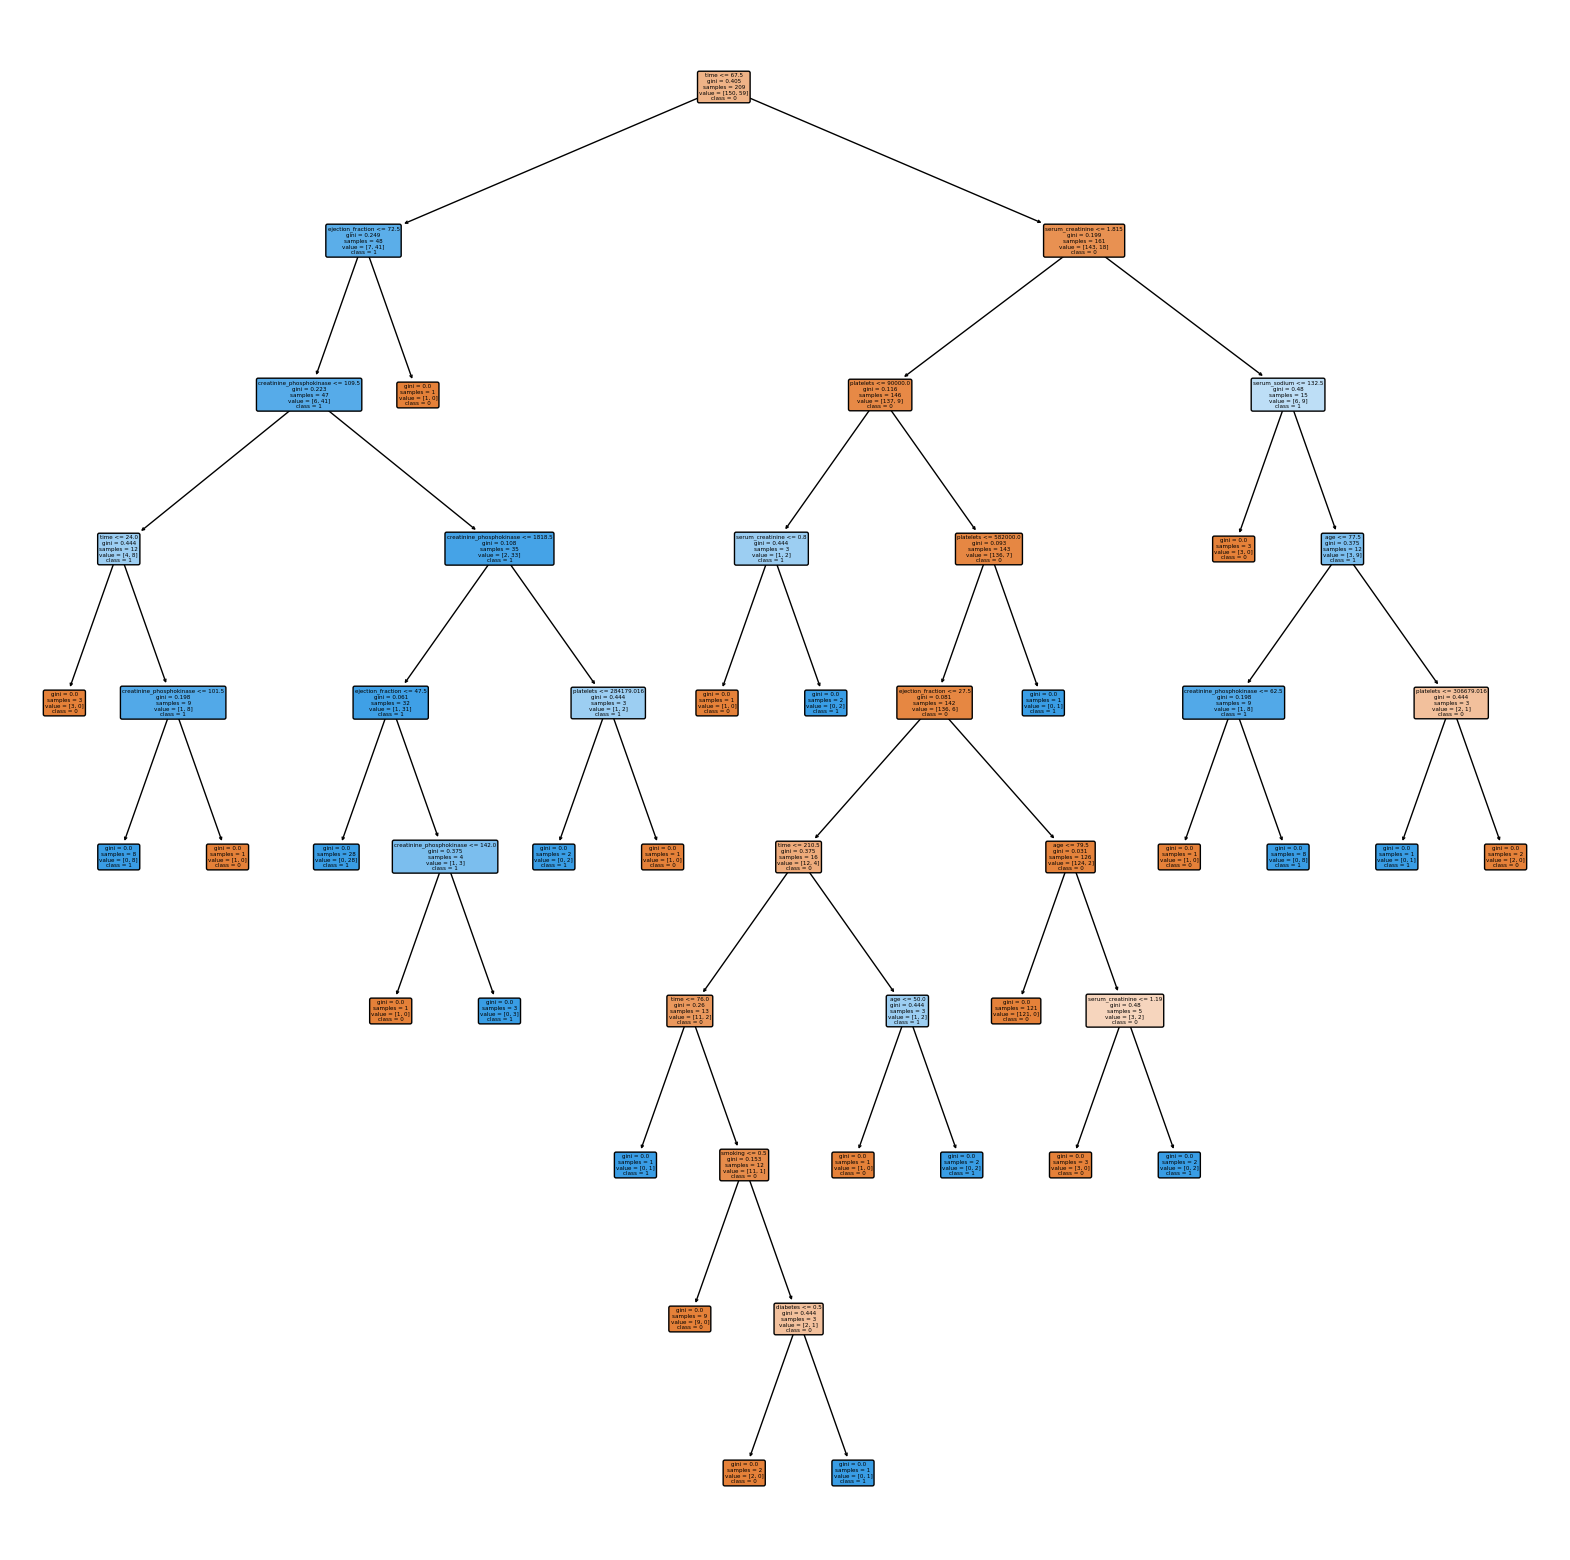

In [135]:
plt.figure(figsize = (20, 20))
tree.plot_tree(dt, filled = True, rounded = True, feature_names = x.columns, class_names = ['0', '1'])
#plt.savefig('tree.png', dpi = 1200)

In [136]:
pred = dt.predict(xtest)
pred

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

In [137]:
np.array(ytest)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

# Confusion Matrix

In [138]:
classification_report(ytest, pred)

'              precision    recall  f1-score   support\n\n           0       0.70      0.79      0.74        53\n           1       0.63      0.51      0.57        37\n\n    accuracy                           0.68        90\n   macro avg       0.67      0.65      0.66        90\nweighted avg       0.67      0.68      0.67        90\n'

In [139]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.70      0.79      0.74        53
           1       0.63      0.51      0.57        37

    accuracy                           0.68        90
   macro avg       0.67      0.65      0.66        90
weighted avg       0.67      0.68      0.67        90



In [140]:
cm = confusion_matrix(ytest, pred)
cm

array([[42, 11],
       [18, 19]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

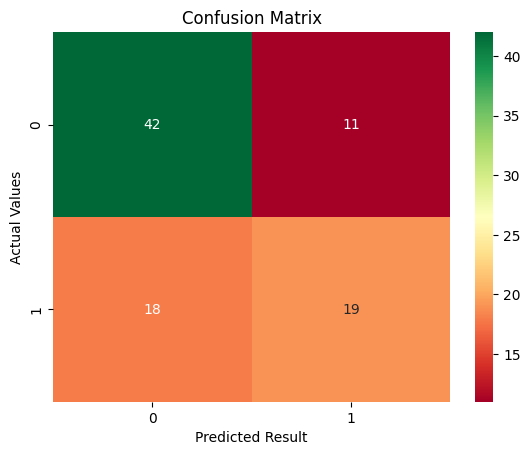

In [141]:
sns.heatmap(cm, annot = True, cmap = 'RdYlGn')
plt.xlabel('Predicted Result')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')

In [142]:
tp, fn, fp, tn = confusion_matrix(ytest, pred).reshape(-1)

In [143]:
tp

42

In [144]:
fn

11

In [145]:
fp

18

In [146]:
tn

19

In [147]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.6777777777777778

In [148]:
precision = tp / (tp + fp)
precision

0.7

In [149]:
fpr, tpr, thresholds = roc_curve(ytest, pred)

Text(0.5, 1.0, 'ROC Curve')

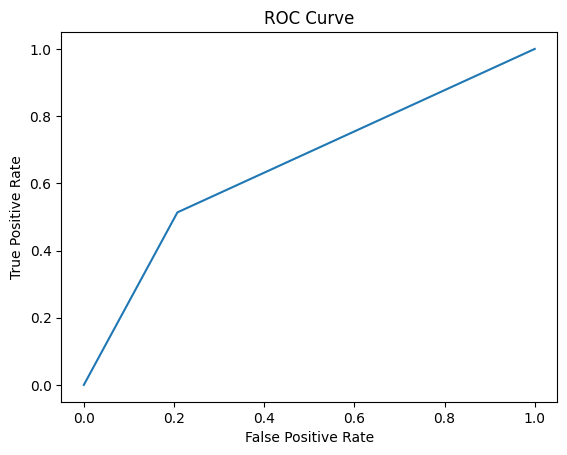

In [150]:
plt.plot(fpr, tpr, label = 'ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

In [151]:
accuracy_score(ytest, pred)

0.6777777777777778

In [152]:
dt.score(xtest, ytest)

0.6777777777777778

# Random Forest Classifier

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
rf = RandomForestClassifier()

In [155]:
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [156]:
rf.score(xtest, ytest)

0.7666666666666667

# Random Search CV

In [157]:
from sklearn.model_selection import RandomizedSearchCV

In [158]:
tree = np.random.randint(15, 150, 30)
tree

array([123, 139, 138,  37,  68, 103,  62,  19,  27,  97,  48,  64,  56,
        21, 142, 109, 113,  60,  23,  36,  88,  33,  93,  24,  37,  82,
       144,  26,  66,  86])

In [159]:
max_features = ['sqrt', 'log2']
max_depth = np.random.randint(2, 12, 50)
criterion = ['gini', 'entropy']
min_samples_split = [2, 3, 4]

In [160]:
grid = {
    
    'n_estimators': tree,
    'criterion': criterion,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split
    
}
print(grid)

{'n_estimators': array([123, 139, 138,  37,  68, 103,  62,  19,  27,  97,  48,  64,  56,
        21, 142, 109, 113,  60,  23,  36,  88,  33,  93,  24,  37,  82,
       144,  26,  66,  86]), 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2'], 'max_depth': array([ 5, 10,  6, 10,  2, 10, 10,  8,  8,  9,  8,  2,  2, 10,  8,  9,  6,
        7,  8,  7,  5,  6,  7,  2,  2,  7, 11,  7,  9,  3, 11,  5, 10,  6,
        9,  3, 11,  3,  6,  3, 10,  7,  8, 11,  3, 11, 11,  9, 11, 11]), 'min_samples_split': [2, 3, 4]}


In [161]:
rcv = RandomizedSearchCV(rf, grid, n_iter = 100, cv = 3)

In [162]:
rcv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 5, 10,  6, 10,  2, 10, 10,  8,  8,  9,  8,  2,  2, 10,  8,  9,  6,
        7,  8,  7,  5,  6,  7,  2,  2,  7, 11,  7,  9,  3, 11,  5, 10,  6,
        9,  3, 11,  3,  6,  3, 10,  7,  8, 11,  3, 11, 11,  9, 11, 11]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4],
                                        'n_estimators': array([123, 139, 138,  37,  68, 103,  62,  19,  27,  97,  48,  64,  56,
        21, 142, 109, 113,  60,  23,  36,  88,  33,  93,  24,  37,  82,
       144,  26,  66,  86])})

In [163]:
tuning_result = pd.DataFrame(rcv.cv_results_)
tuning_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.052358,0.000365,0.005676,0.000233,56,4,sqrt,11,gini,"{'n_estimators': 56, 'min_samples_split': 4, '...",0.800000,0.928571,0.826087,0.851553,0.055492,81
1,0.107768,0.002229,0.009473,0.001784,113,3,log2,9,entropy,"{'n_estimators': 113, 'min_samples_split': 3, ...",0.828571,0.942857,0.855072,0.875500,0.048842,9
2,0.025745,0.000315,0.004026,0.000407,27,4,sqrt,6,entropy,"{'n_estimators': 27, 'min_samples_split': 4, '...",0.814286,0.928571,0.869565,0.870807,0.046665,22
3,0.020881,0.000169,0.003652,0.000497,21,3,log2,8,entropy,"{'n_estimators': 21, 'min_samples_split': 3, '...",0.814286,0.914286,0.855072,0.861215,0.041055,52
4,0.102840,0.001540,0.008053,0.000418,109,2,sqrt,10,entropy,"{'n_estimators': 109, 'min_samples_split': 2, ...",0.814286,0.928571,0.840580,0.861146,0.048871,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.034392,0.000305,0.004613,0.000225,36,2,log2,8,entropy,"{'n_estimators': 36, 'min_samples_split': 2, '...",0.857143,0.942857,0.840580,0.880193,0.044823,7
96,0.022314,0.000321,0.004022,0.000026,23,2,log2,5,gini,"{'n_estimators': 23, 'min_samples_split': 2, '...",0.828571,0.928571,0.840580,0.865908,0.044580,46
97,0.064872,0.001226,0.005844,0.000626,68,3,sqrt,8,entropy,"{'n_estimators': 68, 'min_samples_split': 3, '...",0.800000,0.900000,0.869565,0.856522,0.041854,69
98,0.096702,0.001697,0.008189,0.000147,103,4,sqrt,10,entropy,"{'n_estimators': 103, 'min_samples_split': 4, ...",0.828571,0.942857,0.840580,0.870669,0.051279,34


In [164]:
rcv.best_score_

0.8898550724637682

In [165]:
rcv.best_params_

{'n_estimators': 36,
 'min_samples_split': 4,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [178]:
rcv.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=36)

In [179]:
rcv2 = rcv.best_estimator_

In [181]:
rcv2.fit(xtrain, ytrain)

RandomForestClassifier(max_depth=7, min_samples_split=4, n_estimators=36)

In [180]:
rcv2.score(xtest, ytest)

0.7777777777777778

In [182]:
rcv.score(xtest, ytest)

0.8111111111111111